In [1]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import fusion
import time
import numpy as np

mpl.rcParams['figure.figsize'] = 10, 8
mpl.rcParams['lines.color'] = 'r'

In [10]:
data = []
with open("gyro.dat",'r') as f:
        for line in f:
            result = re.findall(r"-?\d+.\d+", line)
            if len(result) == 10:
                data.append([float(x) for x in result])

In [11]:
def start_angle(a):
    norm = sum(a ** 2) ** 0.5
    a = a / norm
    ψ = np.arcsin(a[0])
    ϕ = np.arctan2(a[1], a[2])
    return ψ, ϕ
    

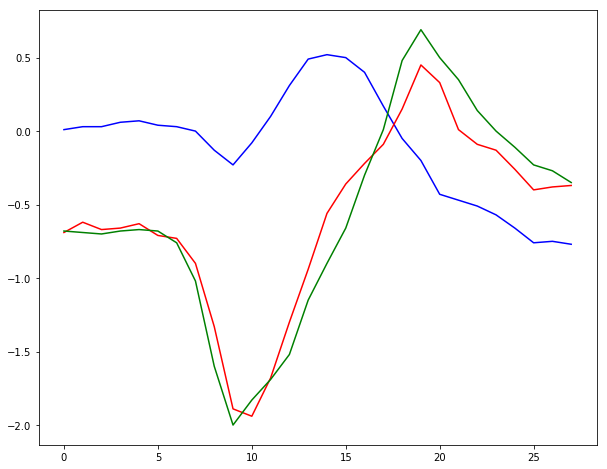

In [12]:
plt.plot([x[1] for x in data], color='b')
plt.plot([x[2] for x in data], color='r')
plt.plot([x[3] for x in data], color='g')
plt.show()

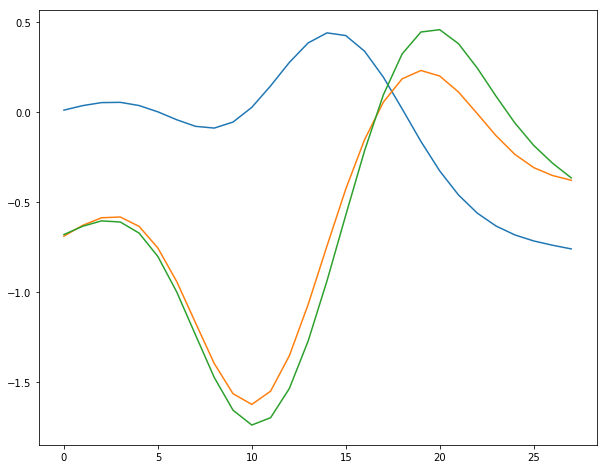

In [13]:
for i in range(1, 4):
    x = [x[i] for x in data]
    b, a = signal.butter(3, 0.2)
    y = signal.filtfilt(b, a, x)
    plt.plot(y)
    
plt.show()

In [14]:
pitch, roll = start_angle(np.array(data[0][1:4]))
fusioner = fusion.Fusion(roll=roll, pitch=pitch)
dtime = 0.02
angles = []
for a in data:
    fusioner.update_nomag(dtime, (a[1], a[2], a[3]), (a[4], a[5], a[6]))
    #fusioner.update_nomag(a[0], (a[1], a[2], a[3]), filtered_g)
    angles.append([fusioner.pitch, fusioner.heading, fusioner.roll])
angles.pop(0)

[0.3302029716547137, -0.13402605601979145, -134.32386841011729]

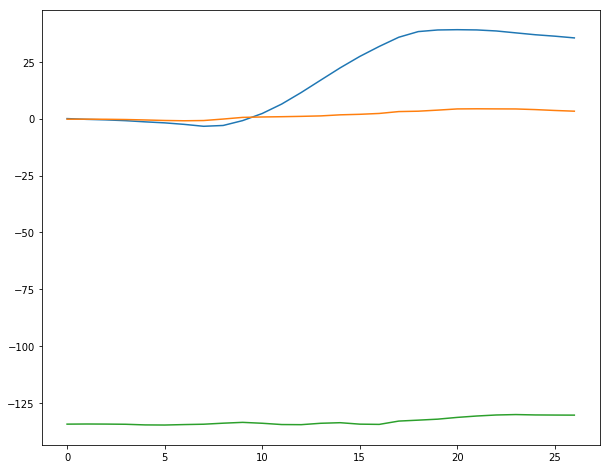

In [15]:
plt.plot([x[0] for x in angles])
plt.plot([x[1] for x in angles])
plt.plot([x[2] for x in angles])
plt.show()

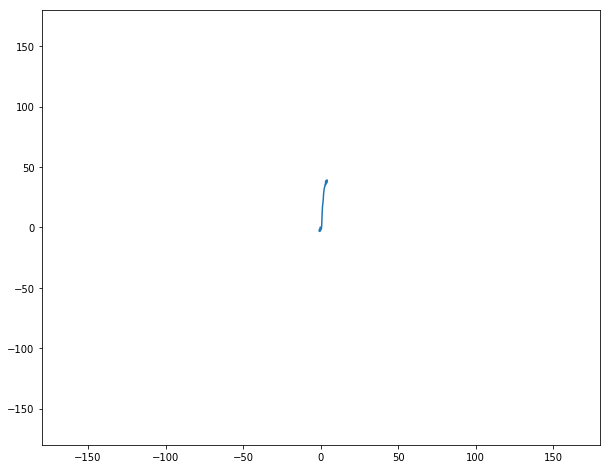

In [16]:
data_x = [x[1] for x in angles]
data_y = [x[0] for x in angles]
plt.plot([x[1] for x in angles], [x[0] for x in angles])
plt.ylim(-180, 180)
plt.xlim(-180, 180)
plt.show()